# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a simple [linear regression model](https://scikit-learn.org/stable/modules/linear_model.html)
        - An advanced regressor of your choice (e.g., Random Forest, Neural Network, etc.)

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Assuming that the files `adult.data` and `adult.test` are in `../data/adult/`, then you can use the code below to load them.

In [75]:
import pandas as pd
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
fires_dt = (pd.read_csv('../../05_src/data/fires/forestfires.csv', header = 0, names = columns))
fires_dt.describe()


,coord_x,coord_y,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [76]:
fires_dt.head()


,coord_x,coord_y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [77]:
fires_dt.shape

(517, 13)

In [78]:
fires_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coord_x  517 non-null    int64  
 1   coord_y  517 non-null    int64  
 2   month    517 non-null    object 
 3   day      517 non-null    object 
 4   ffmc     517 non-null    float64
 5   dmc      517 non-null    float64
 6   dc       517 non-null    float64
 7   isi      517 non-null    float64
 8   temp     517 non-null    float64
 9   rh       517 non-null    int64  
 10  wind     517 non-null    float64
 11  rain     517 non-null    float64
 12  area     517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


# Get X and Y

Create the features data frame and target data.

In [79]:
X = fires_dt.drop('area', axis=1)
y = fires_dt['area']

# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [80]:
# preproc1

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
import pandas as pd

# Mapping dictionaries for month and day Categorical Columns
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 
    'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 
    'nov': 11, 'dec': 12
}

day_mapping = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 
    'sat': 6, 'sun': 7
}

# Custom mapping function for OneHotEncoder
def custom_OneHotEncoder(X):
    X_df = pd.DataFrame(X, columns=['month', 'day'])
    X_df['month'] = X_df['month'].map(month_mapping)
    X_df['day'] = X_df['day'].map(day_mapping)
    return pd.get_dummies(X_df).values  # Convert to one-hot encoding

# Step 1: Define Column Lists
categorical_features = fires_dt.select_dtypes('object').columns.to_list()
numerical_features = fires_dt.columns.to_list()
for col in categorical_features:
    numerical_features.remove(col)
numerical_features.remove('area')

# Step 2: Create preproc1
preproc1 = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', FunctionTransformer(custom_OneHotEncoder), categorical_features)
    ]
)

preproc1.fit(X)

ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('cat',
                                 FunctionTransformer(func=<function custom_OneHotEncoder at 0x17ffacc10>),
                                 ['month', 'day'])])

### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

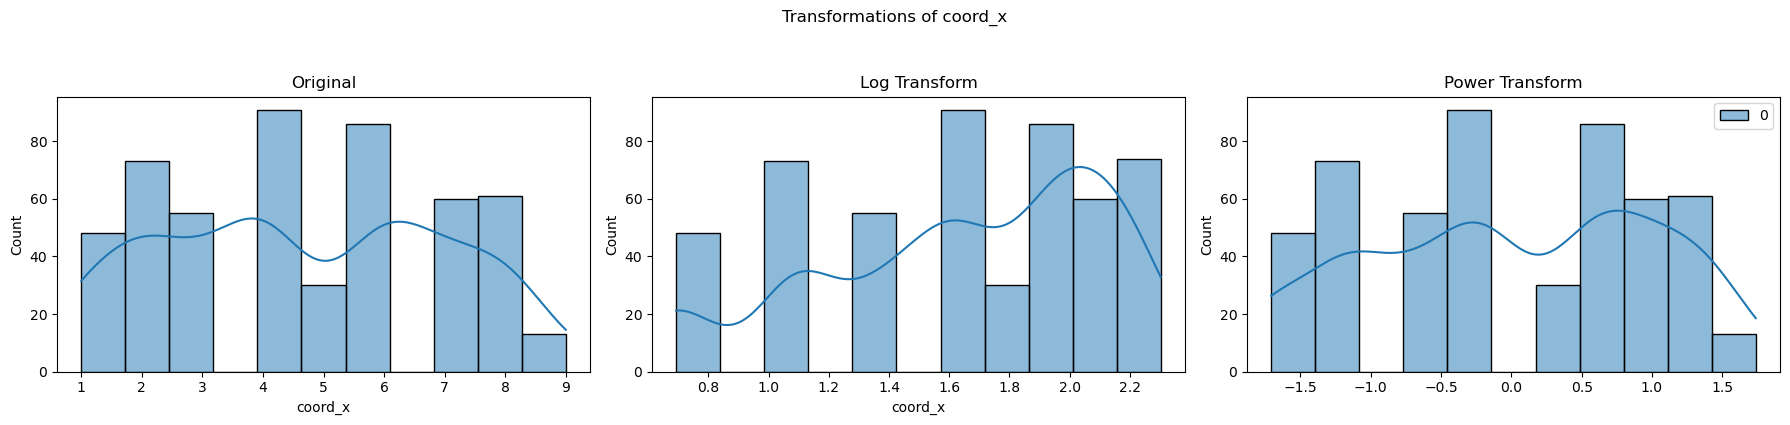

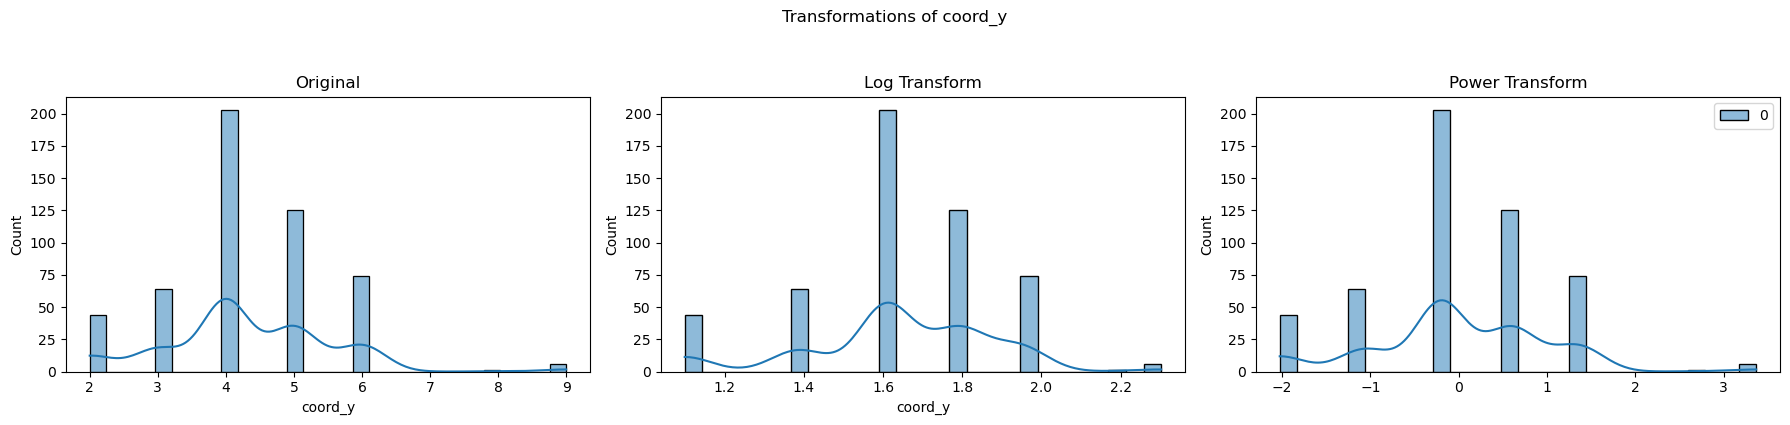

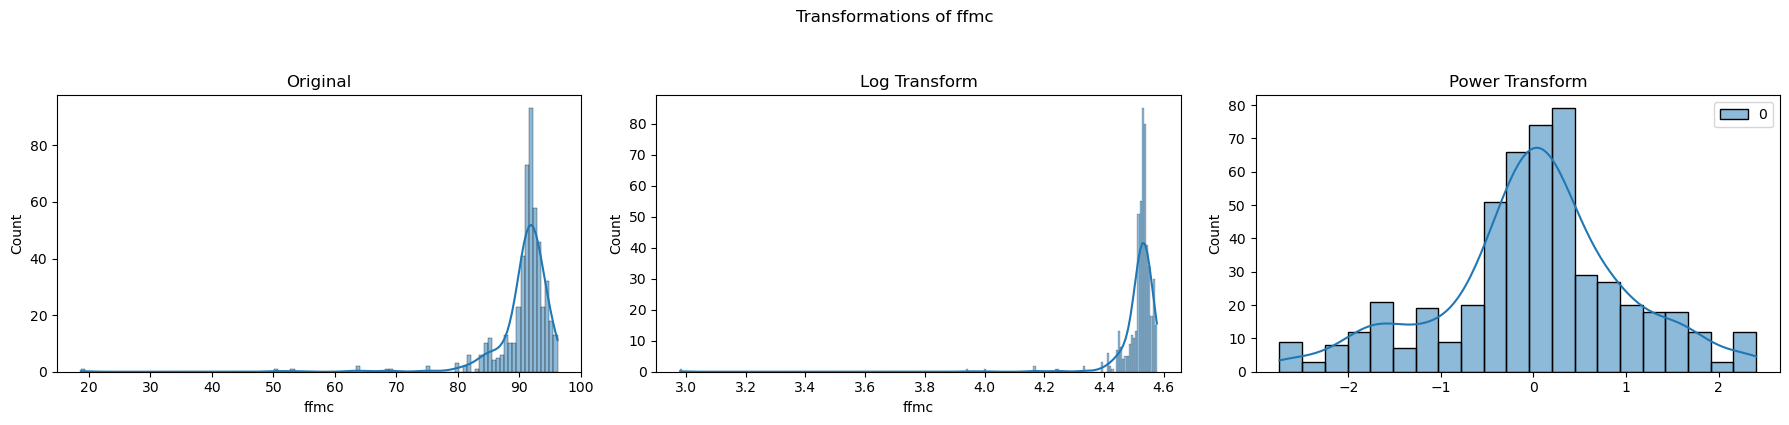

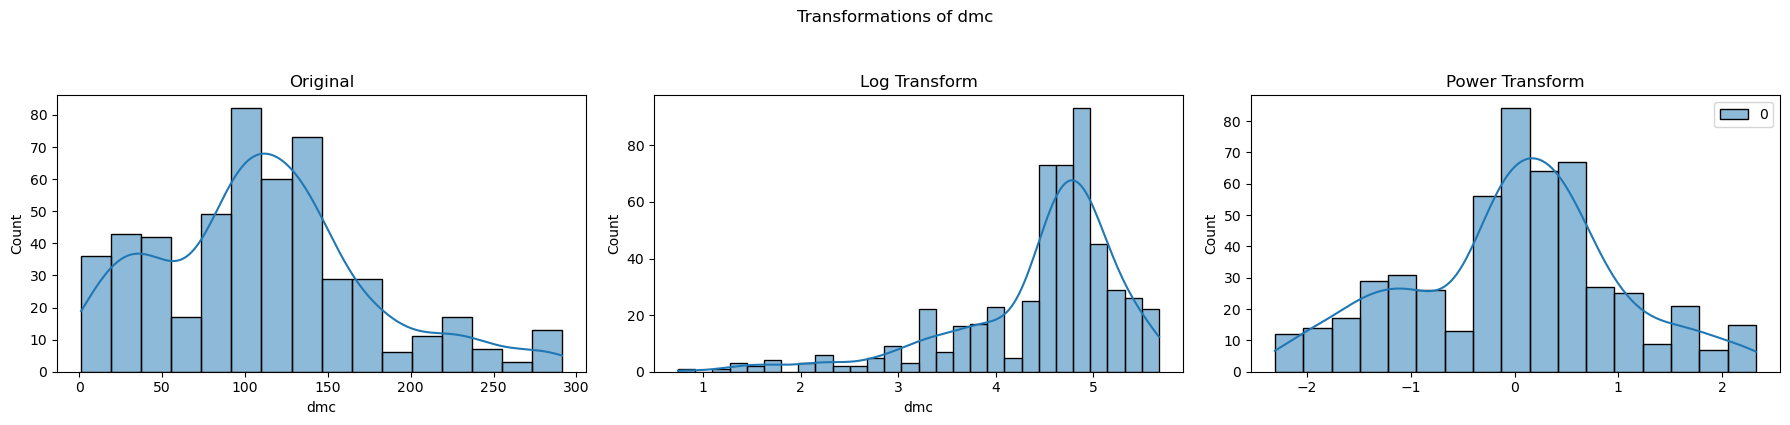

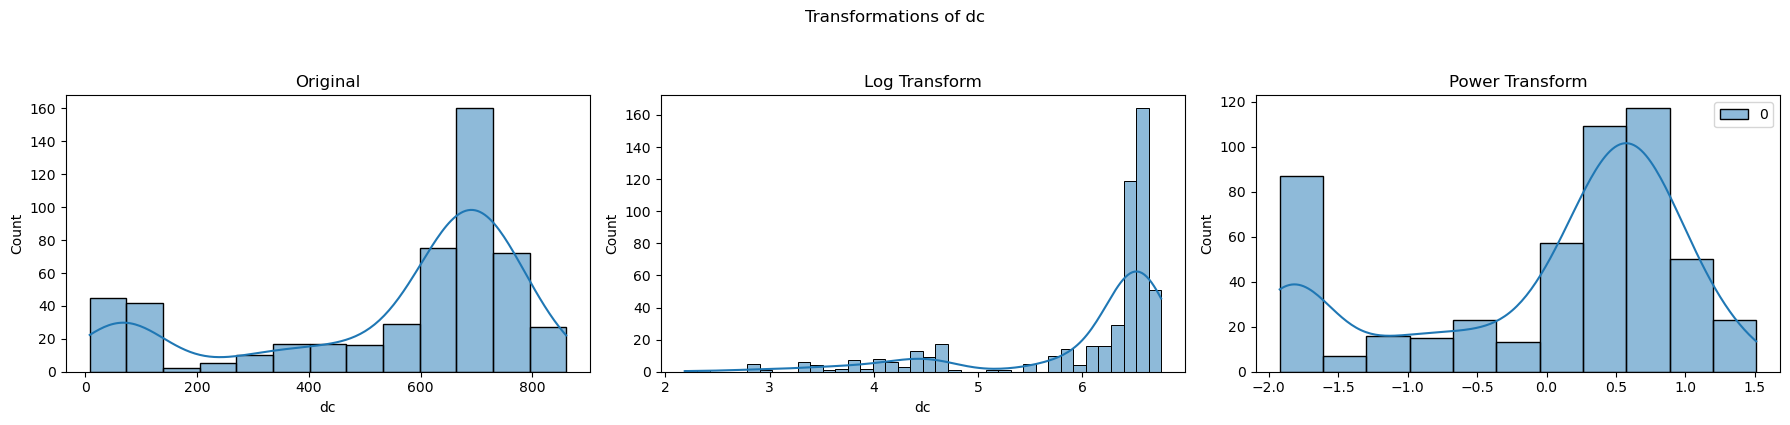

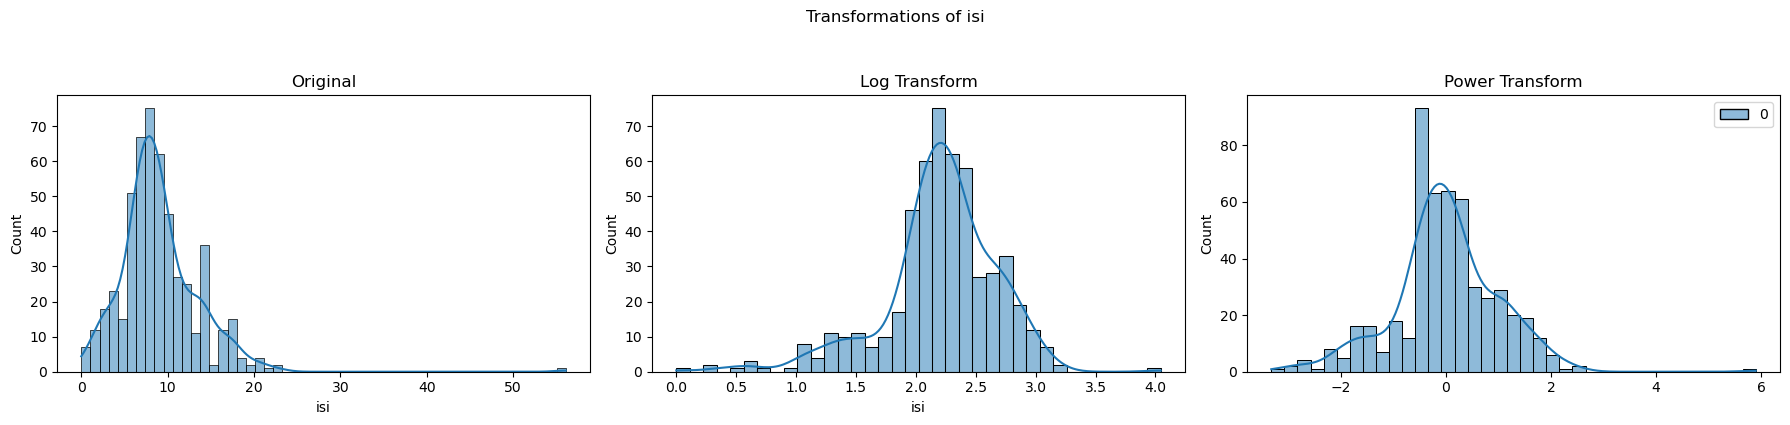

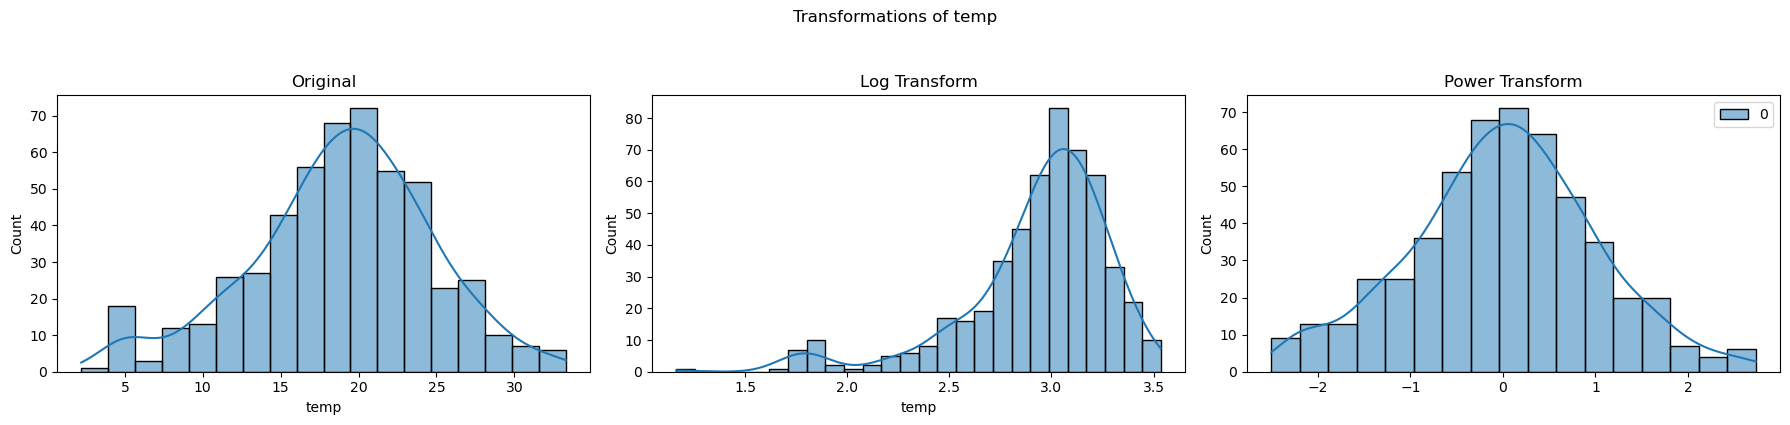

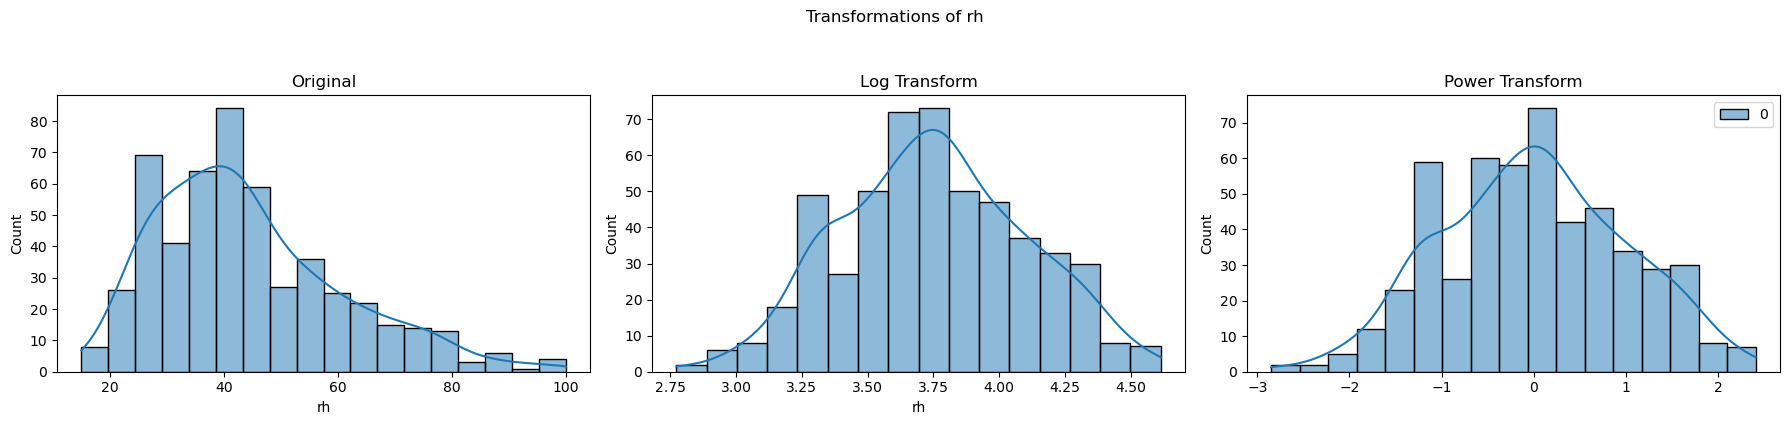

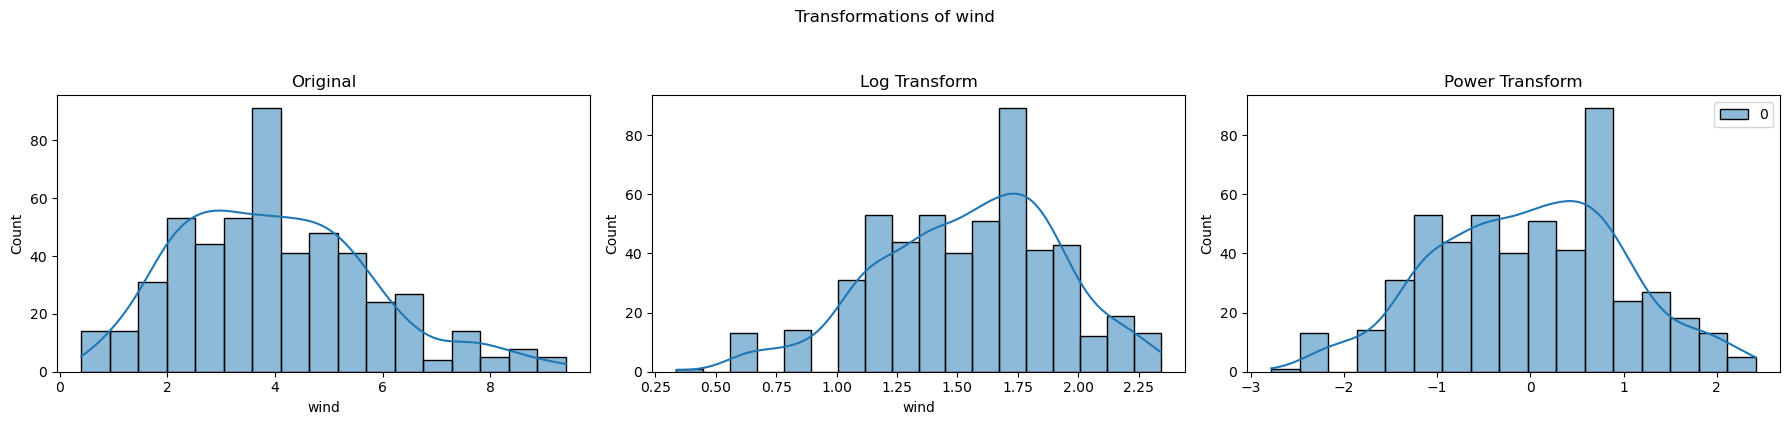

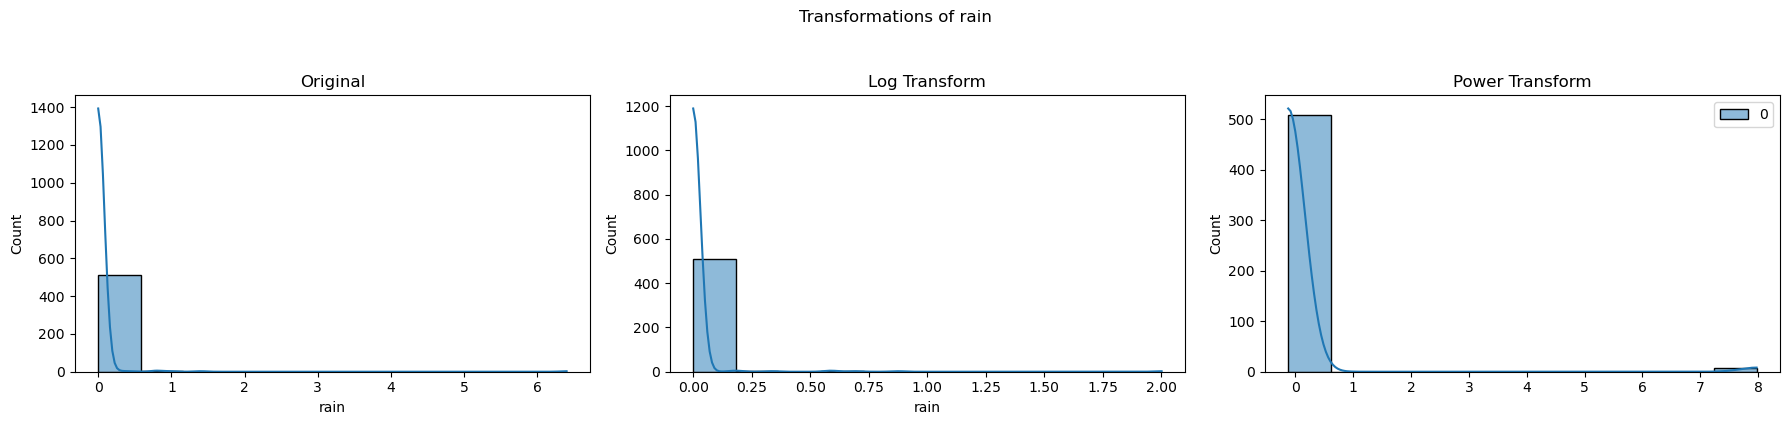

In [81]:
# preproc2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

# Initialize PowerTransformer
power_transformer = PowerTransformer()

# Function to plot original, log-transformed, and power-transformed data
def visualize_transformations(feature):
    fig, axs = plt.subplots(1, 3, figsize=(18, 4))
    fig.suptitle(f'Transformations of {feature}', y=1.05)
    
    # Original data
    sns.histplot(X[feature], kde=True, ax=axs[0])
    axs[0].set_title('Original')
    
    # Log transformation
    sns.histplot(np.log1p(X[feature]), kde=True, ax=axs[1])
    axs[1].set_title('Log Transform')
    
    # Power transformation
    transformed_data = power_transformer.fit_transform(X[[feature]].values)
    sns.histplot(transformed_data, kde=True, ax=axs[2])
    axs[2].set_title('Power Transform')
    
    plt.tight_layout()
    plt.show()

# Apply the visualization to each numerical feature
for feature in numerical_features:
    visualize_transformations(feature)

In [82]:
from sklearn.preprocessing import PowerTransformer, FunctionTransformer
from sklearn.pipeline import Pipeline

# Define a Power Transformation function or use the PowerTransformer directly
power_transformer = PowerTransformer()

# Step 2: Define Transformers for preproc2
# Numerical Transformer: Use PowerTransformer followed by MinMaxScaler
numeric_transformer_2 = Pipeline([
    ('power', power_transformer),
    ('scaler', MinMaxScaler())
])

# Adjust custom_OneHotEncoder function to ensure compatibility with preproc1

# Step 3: Create preproc2
preproc2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_2, numerical_features),
        ('cat', FunctionTransformer(custom_OneHotEncoder), categorical_features)
    ]
)

preproc2.fit(X) 

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('power', PowerTransformer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('cat',
                                 FunctionTransformer(func=<function custom_OneHotEncoder at 0x17ffacc10>),
                                 ['month', 'day'])])

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [83]:
from sklearn.linear_model import Ridge
# Pipeline A = preproc1 + baseline
pipeline_A = Pipeline([
    ('preprocessing', preproc1),
    ('regressor', Ridge())
])

In [25]:
# Pipeline B = preproc2 + baseline
pipeline_B = Pipeline([
    ('preprocessing', preproc2),
    ('regressor', Ridge())
])

In [27]:
from sklearn.ensemble import RandomForestRegressor
pipeline_C = Pipeline([
    ('preprocessing', preproc1),
    ('regressor', RandomForestRegressor())
])

In [72]:
# Pipeline D = preproc2 + advanced model
pipeline_D = Pipeline([
    ('preprocessing', preproc2),
    ('regressor', RandomForestRegressor())
])

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [85]:
from sklearn.model_selection import GridSearchCV
param_grid_ridge_A_new = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1],
    'regressor__solver': ['lsqr', 'saga', 'svd'],
    'regressor__tol': [1e-5, 1e-4, 1e-3]
}

# GridSearchCV for Pipeline A
grid_search_A_new = GridSearchCV(pipeline_A, param_grid_ridge_A_new, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_A_new.fit(X_train, y_train)
best_params_A_new = grid_search_A_new.best_params_
best_score_A_new = -grid_search_A_new.best_score_

print(f"Pipeline A New Best Params: {best_params_A_new}")
print(f"Pipeline A New Best RMSE: {best_score_A_new}")

Pipeline A New Best Params: {'regressor__alpha': 1, 'regressor__solver': 'lsqr', 'regressor__tol': 0.001}
Pipeline A New Best RMSE: 39.13677472064791


In [88]:
# Pipeline B: preproc2 + Ridge
# Different parameter grid for Ridge
param_grid_ridge_B_new = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1],
    'regressor__fit_intercept': [True, False, 'deprecated'],
    'regressor__tol': [1e-5, 1e-4, 1e-3, 0]
}

# GridSearchCV for Pipeline B
grid_search_B_new = GridSearchCV(pipeline_B, param_grid_ridge_B_new, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_B_new.fit(X_train, y_train)
best_params_B_new = grid_search_B_new.best_params_
best_score_B_new = -grid_search_B_new.best_score_

print(f"Pipeline B New Best Params: {best_params_B_new}")
print(f"Pipeline B New Best RMSE: {best_score_B_new}")

Pipeline B New Best Params: {'regressor__alpha': 1, 'regressor__fit_intercept': False, 'regressor__tol': 1e-05}
Pipeline B New Best RMSE: 38.920762542151536


/Users/swinder/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/swinder/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/swinder/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/swinder/miniconda3/envs/dsi_participant/lib/python3.9/sit

In [89]:
param_grid_rf_C_new = {
    'regressor__n_estimators': [50, 100, 200, 300],
    'regressor__max_depth': [None, 5, 10, 20],
    'regressor__min_samples_split': [2, 3, 4],
    'regressor__criterion': ['mse', 'mae', 'poisson']
}

# GridSearchCV for Pipeline C
grid_search_C_new = GridSearchCV(pipeline_C, param_grid_rf_C_new, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_C_new.fit(X_train, y_train)
best_params_C_new = grid_search_C_new.best_params_
best_score_C_new = -grid_search_C_new.best_score_

print(f"Pipeline C New Best Params: {best_params_C_new}")
print(f"Pipeline C New Best RMSE: {best_score_C_new}")

Pipeline C New Best Params: {'regressor__criterion': 'poisson', 'regressor__max_depth': 10, 'regressor__min_samples_split': 3, 'regressor__n_estimators': 100}
Pipeline C New Best RMSE: 44.79971774702458


/Users/swinder/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
480 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/swinder/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/swinder/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/swinder/miniconda3/envs/dsi_participant/lib/python3.9/si

In [91]:
# Pipeline D: preproc2 + RandomForest
# Different parameter grid for RandomForest
param_grid_rf_D_new = {
    'regressor__n_estimators': [50, 75, 100, 125],
    'regressor__max_features': ['auto', 'sqrt', 'log2', None],
    'regressor__bootstrap': [True, False],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for Pipeline D
grid_search_D_new = GridSearchCV(pipeline_D, param_grid_rf_D_new, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_D_new.fit(X_train, y_train)
best_params_D_new = grid_search_D_new.best_params_
best_score_D_new = -grid_search_D_new.best_score_

print(f"Pipeline D New Best Params: {best_params_D_new}")
print(f"Pipeline D New Best RMSE: {best_score_D_new}")

Pipeline D New Best Params: {'regressor__bootstrap': True, 'regressor__max_features': 'log2', 'regressor__min_samples_leaf': 4, 'regressor__n_estimators': 75}
Pipeline D New Best RMSE: 40.12333126407881


/Users/swinder/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
120 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
76 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/swinder/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/swinder/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/swinder/miniconda3/envs/dsi_participant/lib/python3.9/si

In [92]:
print("New Summary of Results After Additional Experiments:")
print(f"Experiment Pipeline A Best RMSE: {best_score_A_new}")
print(f"Experiment Pipeline B Best RMSE: {best_score_B_new}")
print(f"Experiment Pipeline C Best RMSE: {best_score_C_new}")
print(f"Experiment Pipeline D Best RMSE: {best_score_D_new}")

New Summary of Results After Additional Experiments:
Experiment Pipeline A Best RMSE: 39.13677472064791
Experiment Pipeline B Best RMSE: 38.920762542151536
Experiment Pipeline C Best RMSE: 44.79971774702458
Experiment Pipeline D Best RMSE: 40.12333126407881


# Evaluate

+ Which model has the best performance?

In [96]:
print(grid_search_B_new.best_params_)
print( grid_search_B_new.best_score_)

{'regressor__alpha': 1, 'regressor__fit_intercept': False, 'regressor__tol': 1e-05}
-38.920762542151536


# Export

+ Save the best performing model to a pickle file.

In [102]:
import pickle

best_params_B = grid_search_B_new.best_params_
best_score_B = grid_search_B_new.best_score_

pipeline_B.set_params(**best_params_B)

# Train the best-performing model (Pipeline B) on the entire dataset
pipeline_B.fit(X, y)
pipeline_B
# with open("bst_model.pkl", 'wb') as file:
#     pickle.dump(pipeline_B, file)

# print(f'The best model (Pipeline B) has been saved to {best_model_filename}')

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat',
                                                  FunctionTransformer(func=<function custom_OneHotEncoder at 0x16a98ca60>),
                                                  ['month', 'day'])])),
                ('regressor', Ridge(alpha=1, fit_intercept=False, tol=1e-05))])

# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

In [98]:
import shap

# Load the trained model from the pickle file if necessary
best_model_filename = 'best_pipeline_model.pkl'
with open(best_model_filename, 'rb') as file:
    pipeline_B = pickle.load(file)


pipeline_B

EOFError: Ran out of input

*(Answer here.)*

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.